In [206]:
%matplotlib inline

In [207]:
import pandas as pd
import igraph as ig
import sys, getopt
import time
import matplotlib.pyplot as plt
from itertools import zip_longest

In [208]:
def printUsage():
    print('Usage: python3 ig-compose.py <inputfile1> <inputfile2>')

union time = 0.00018095970153808594
G0 edge attr:  ['b', 'z', 'c', 'a', 'x']
G1 node attributes: ['aaa', 'bbb', 'ccc', 'xxx', 'yyy', 'zzz']
G2 node attributes: ['aaa', 'bbb', 'cc', 'xx', 'yyy', 'zzz']
G0 node attributes: ['yyy', 'aaa', 'ccc', 'cc', 'xx', 'bbb', 'xxx', 'zzz']


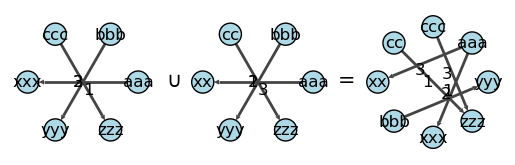

In [209]:
# def main(argv):
#     try:
#         opts, args = getopt.getopt(argv, "h") # opts = [("-h", " ")], args = [inputfile1, inputfile2]
#     except getopt.GetoptError:
#         printUsage()
#         sys.exit(2)
#     for opt, arg in opts:
#         if opt == '-h':
#             printUsage()
#             sys.exit()
#         else:
#             printUsage()
#             sys.exit(2)
#     if len(args) != 2:
#             printUsage()
#             sys.exit(2)       
#     edgefile1 = args[0]
#     edgefile2 = args[1]

edgefile1, edgefile2 = "11.edges", "22.edges"

# read edge info from edge file
# columns = ["s", "d"]
# data1 = pd.read_csv(edgefile1, comment="#", sep="\s+", names=columns)
# edges1 = []
# for row in range(len(data1)):
#     edges1.append([data1["s"][row], data1["d"][row]])
# data2 = pd.read_csv(edgefile2, comment="#", sep="\s+", names=columns)
# edges2 = []
# for row in range(len(data2)):
#     edges2.append([data2["s"][row], data2["d"][row]])

# create graph based on edge file
# DO NOT USE igraph._igraph.GraphBase, USE SUBCLASS igraph.Graph instead
# Read_Edgelist() in igraph is 0-based !!! (number vertices from 0)
# G1 = ig.Graph.Read_Edgelist(edgefile1, directed=False)
# G2 = ig.Graph.Read_Edgelist(edgefile2, directed=False)

# create graph based on dataframe
source1 = ["aaa", "bbb", "ccc"]
target1 = ["xxx", "yyy", "zzz"]
weight1 = [1, 2, 3]
attr1 = ["a", "b", "c"]
source2 = ["aaa", "bbb", "cc"]
target2 = ["xx", "yyy", "zzz"]
weight2 = [3, 2, 1]
attr2 = ["x", "b", "z"]
data1 = pd.DataFrame({'source':source1, 'target':target1, 'weight':weight1, "attr":attr1}) # edge attr is automatically loaded
data2 = pd.DataFrame({'source':source2, 'target':target2, 'weight':weight2, "attr":attr2})
G1 = ig.Graph.DataFrame(data1, directed=True, use_vids=False)
G2 = ig.Graph.DataFrame(data2, directed=True, use_vids=False)

start = time.time()
G0 = ig.union([G1, G2]) # G0 = G1 U G2, the same edge should have the same edge attribute
end = time.time()
print("union time = " + str(end - start))

print("G0 edge attr: ", [G0.es[i]["attr"] for i in range(len(G0.es))])

# in case of no vertex name
# G1.vs['name'] = ["G1_"+str(i) for i in range(len(G1.vs))]
# G2.vs['name'] = ["G2_"+str(i) for i in range(len(G2.vs))]
# G0.vs["name"] = list(zip_longest(G1.vs["name"], G2.vs["name"]))
print("G1 node attributes: " + str(G1.vs["name"]))
print("G2 node attributes: " + str(G2.vs["name"]))
print("G0 node attributes: " + str(G0.vs["name"]))

# write to file
edgefile0 = edgefile1.split('.edges')[0] + "." + edgefile2.split('.edges')[0] + ".edges"
df = pd.DataFrame(G0.get_edgelist())
df.to_csv(edgefile0, sep=" ", index=False, header=False)

# visulize
visual_style = {
"vertex_color": "lightblue",
"vertex_size": 0.4,
}
fig, axs = plt.subplots(1, 3)
ig.plot(
    G1,
    layout=G1.layout("circle"),
    # vertex_label=range(G1.vcount()),
    vertex_label=G1.vs["name"],
    edge_label=G1.es["weight"],
    target=axs[0],
    **visual_style,
)
ig.plot(
    G2,
    layout=G2.layout("circle"),
    # vertex_label=range(G2.vcount()),
    vertex_label=G2.vs["name"],
    edge_label=G2.es["weight"],
    target=axs[1],
    **visual_style,
)
ig.plot(
    G0,
    layout=G0.layout("circle"),
    # vertex_label=range(G0.vcount()),
    vertex_label=G0.vs["name"],
    edge_label=G0.es["weight"],
    target=axs[2],
    **visual_style,
)
fig.text(0.38, 0.5, '$\cup$', fontsize=15, ha='center', va='center')
fig.text(0.65, 0.5, '=', fontsize=15, ha='center', va='center')
plt.show()

In [210]:
# if __name__ == "__main__":
#    main(sys.argv[1:])  